In [53]:
# imports
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [5]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(BASE_DIR)

ANALYSIS_DIR = os.path.join(BASE_DIR, 'scripts', 'analysis')
sys.path.append(ANALYSIS_DIR)


In [6]:
from titration_fitting import fit_bootstrap, curve_func_new 

In [7]:
DATA_PATH = BASE_DIR + '/data'
df = pd.read_json(f"{DATA_PATH}/wt_mg_titra.json")
df_uucg = pd.read_json(f"{DATA_PATH}/uucg_mg_titra.json")
df_notlr = pd.read_json(f"{DATA_PATH}/no_tlr_mg.json")

### style functions

In [57]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)
    for line in ax.get_xticklines():
        line.set_visible(True)
    ax.xaxis.set_ticks_position('bottom')  # Show x axis ticks only on bottom
    ax.yaxis.set_ticks_position('left')  # Show y axis ticks only on left
    # Set the length of the ticks (in points)
    ax.tick_params(axis='both', which='major', length=4)
    ax.tick_params(axis='both', which='minor', length=4)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())



def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)


def publication_line(ax, x, y, **kwargs):
    ax.plot(x, y, markersize=10, lw=2, **kwargs)

### plotting functions

In [9]:
def normalize_data(data):
    if np.min(data) == np.max(data):
        return data
    return (data - np.min(data)) / (np.max(data) - np.min(data))


def compute_mg_1_2(mg_conc, norm_data ):
    pstart = [1, 1]
    pfit, perr = fit_bootstrap(pstart, mg_conc, norm_data, curve_func_new)
    return pfit, perr

def publication_titration_plot(g, name, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    mg_conc = list(g["mg_conc"])
    data = list(g["gaaa_avg"])
    norm_data = -normalize_data(np.array(data)) + 1
    r = compute_mg_1_2(mg_conc, norm_data)
    plt.scatter(g["mg_conc"], norm_data, s=100)
    xs, ys = [], []
    for j in np.arange(0, 40, 0.01):
        p = r[0]
        y = curve_func_new(j, p[0], p[1])
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, label=name, lw=3)

In [10]:
df_sub = df[df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"]

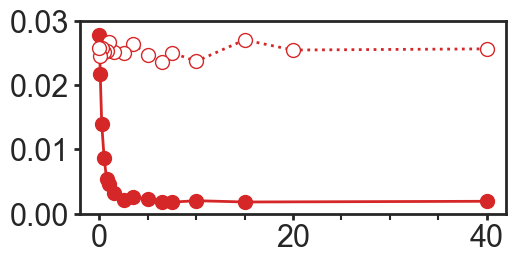

In [58]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
publication_style_ax(ax)
publication_line(ax, df_sub['mg_conc'], df_sub['gaaa_avg'], marker='o', color='tab:red')
publication_line(ax, df_notlr['mg_conc'], df_notlr['gaaa_avg'], marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:red')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02,0.03]);

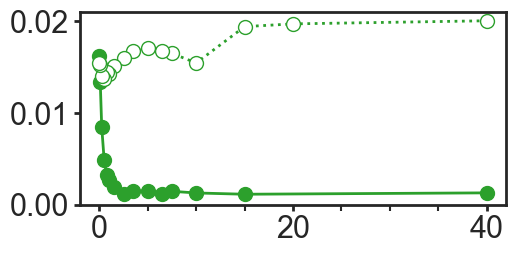

In [60]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 4
publication_style_ax(ax)
publication_line(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:green')
publication_line(ax, df_notlr['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:green')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02]);

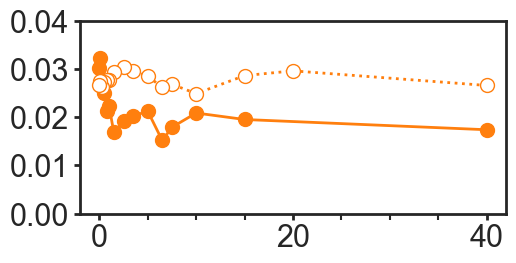

In [63]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 5
publication_style_ax(ax)
publication_line(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:orange')
publication_line(ax, df_notlr['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:orange')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02, 0.03, 0.04]);

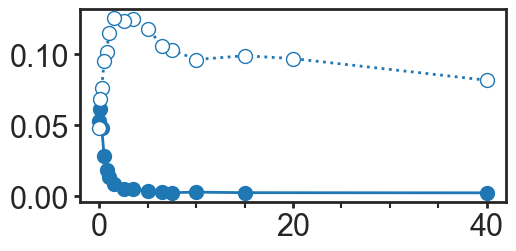

In [64]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 8
publication_style_ax(ax)
publication_line(ax, df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:blue')
publication_line(ax, df_notlr['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:blue')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
#ax.set_yticks([0.0, 0.02,]);